In [2]:
# load the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


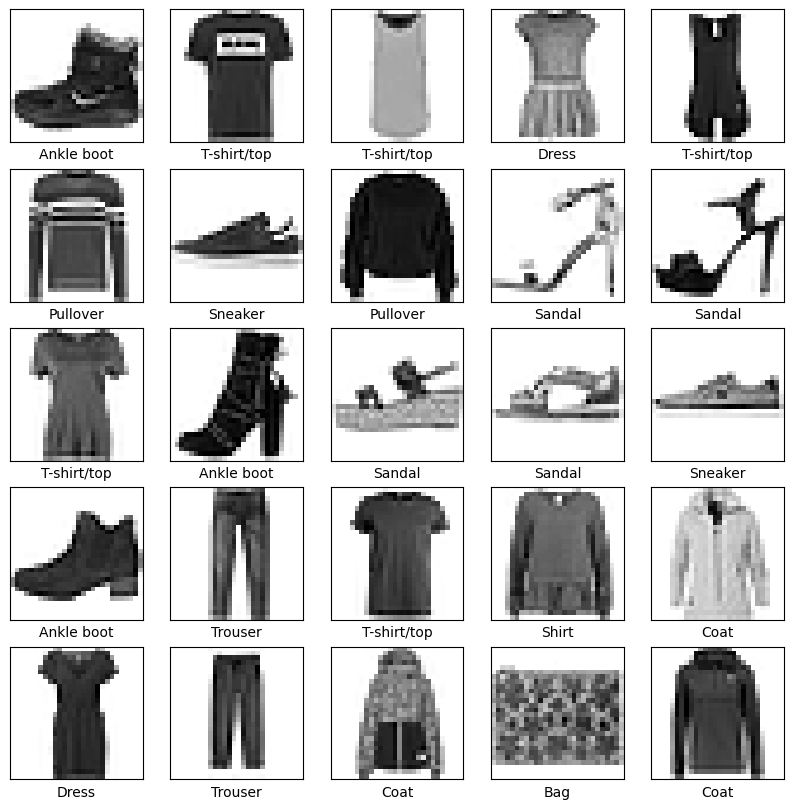

In [5]:
# sample display of the first 25 images in the training set with their corresponding
# classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# plotting the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # grayscale view
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
# 1.Reshape the images
# (60000, 28, 28) -> (60000, 28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 2.Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"New train images shape: {train_images.shape}")

New train images shape: (60000, 28, 28, 1)


In [ ]:
# CNN Model
model = keras.Sequential([
    # 1st Convolution 
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # 2nd Convolution 
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # 3rd Convolution 
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # (Flatten) to Dense
    layers.Flatten(),
    
    # Dense
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes -> softmax
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [11]:
# 10 epochs with validation data
history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.8173 - loss: 0.4985 - val_accuracy: 0.8645 - val_loss: 0.3725
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - accuracy: 0.8841 - loss: 0.3190 - val_accuracy: 0.8853 - val_loss: 0.3150
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8998 - loss: 0.2730 - val_accuracy: 0.8953 - val_loss: 0.2861
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9094 - loss: 0.2454 - val_accuracy: 0.9040 - val_loss: 0.2670
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9180 - loss: 0.2227 - val_accuracy: 0.9009 - val_loss: 0.2788
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9247 - loss: 0.2046 - val_accuracy: 0.9109 - val_loss: 0.2545
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.9308 - loss: 0.1848 - val_accuracy: 0.9078 - val_loss: 0.2689
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 20ms/step - accuracy: 0.9356 -

In [ ]:
# Calculate loss and accuracy on the test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

313/313 - 4s - 13ms/step - accuracy: 0.9106 - loss: 0.2825

Test accuracy: 91.06%


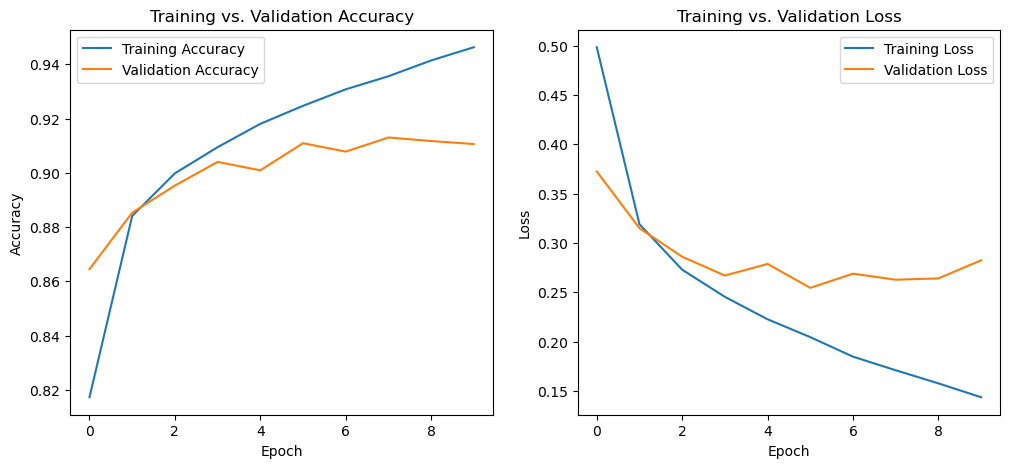

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# 1.  Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# 2.  Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.show()

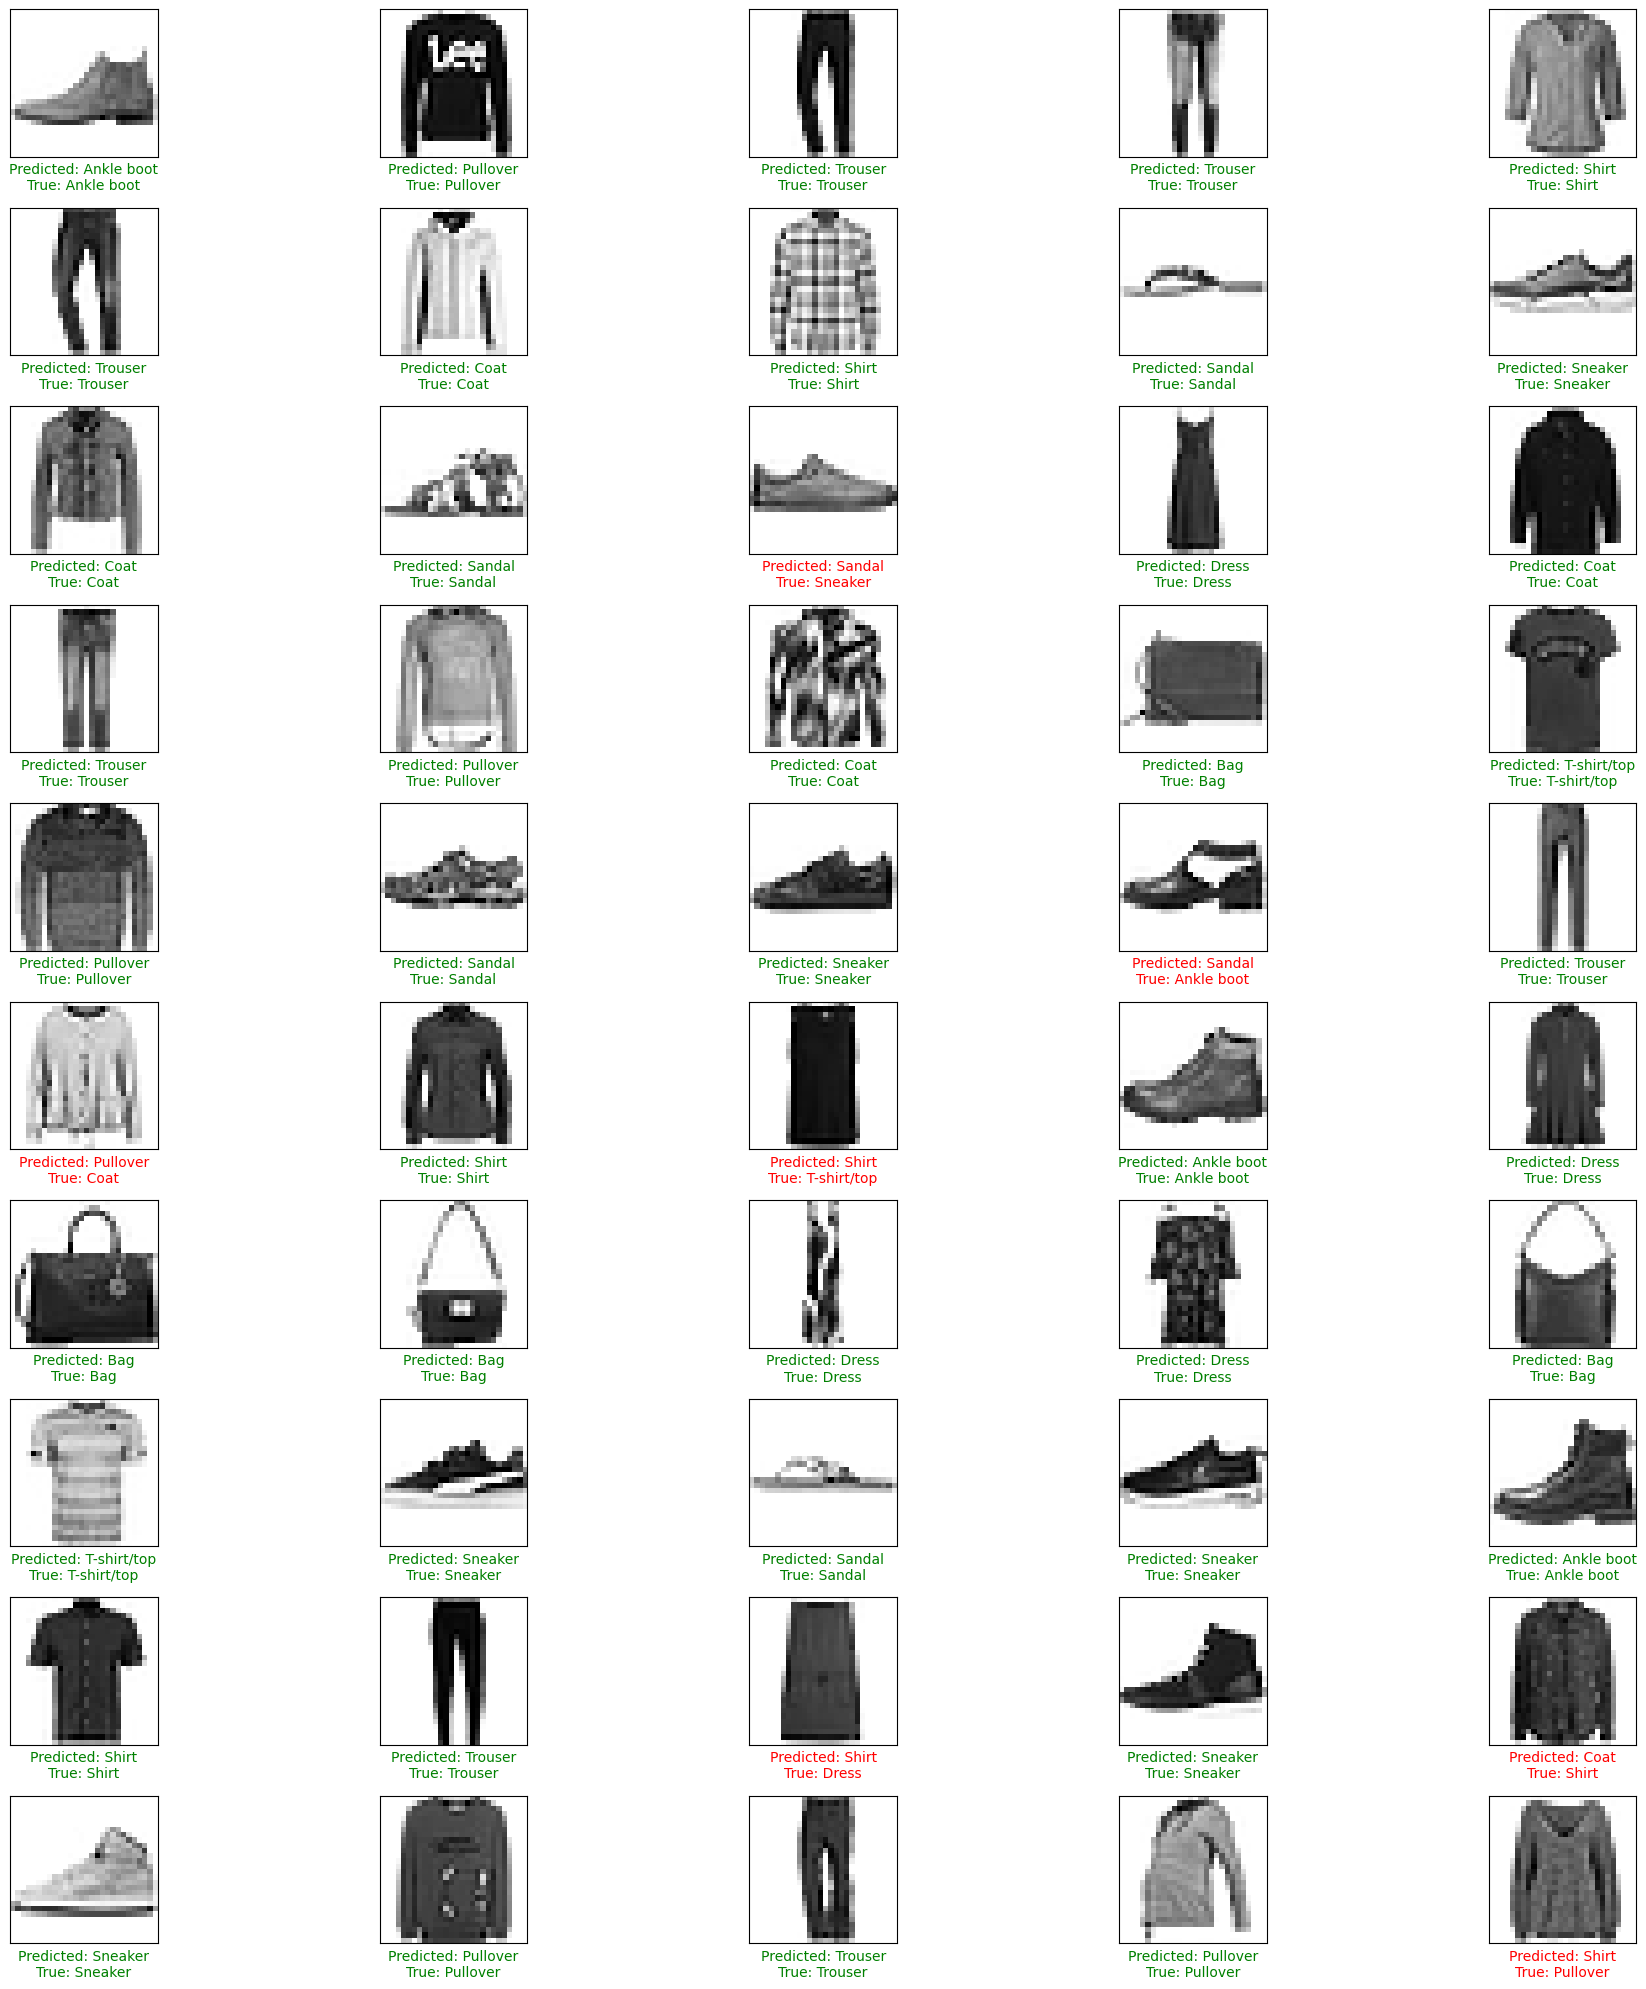

In [22]:
# Function to plot the image, its predicted label, and the true label
def plot_image(i, predictions_array, true_label, img):
    # Get the specific true label and image from the batch/dataset
    true_label, img = true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Display the image
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary) 

    # Get the predicted label (the index with the highest probability)
    predicted_label = np.argmax(predictions_array)
    
    # Set the text color: green if the prediction is correct, red if it's wrong
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add the x-axis label showing the prediction and the true answer
    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)

# ----------------------------------------------------
# Plot a grid of images with their predictions
# ----------------------------------------------------
# Plot 50 images in order
num_rows = 10 
num_cols = 5   
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    if i >= len(test_images):
        break 
        
    plt.subplot(num_rows, num_cols, i + 1)
    # We'll select the first 50 images from the test set
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()